<a href="https://colab.research.google.com/github/hildaeddi/porfolioproject/blob/main/Visual_representation_of_Sentiment_analysis_using_NLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP 1:** Installing kaggle library because the data-set is extracted from the kaggle and used as a data source of the tweets.

In [ ]:
# install kaggle library
! pip install kaggle

**STEP 2:** The path in this notebook is configured for the data received as json file called kaggle.json

In [ ]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Creating pipeline to database (web scrapping)

In [ ]:
!kaggle datasets download -d thedevastator/hate-speech-and-offensive-language-detection

hate-speech-and-offensive-language-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


**STEP 3:** Unzipping the file extracted from kaggle used as database

In [ ]:
from zipfile import ZipFile
dataset = '/content/hate-speech-and-offensive-language-detection.zip'


with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print ('The file is unzip')

The file is unzip


**STEP 4:** Importing the necessary libraries used for the algorithm of sentiment analysis

In [ ]:
import numpy as np
import pandas as pd
import re
!pip install nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

**STEP 5:** Downloading the special data-set cacalled Stop Words that are essential for the pre-processing and sentiment analysis part.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**STEP 6:** Reading the data in csv format extracted through unzipping the zipfile and printing the head of the data to observe it initially.

In [ ]:
tweet_df = pd.read_csv('/content/train.csv')
tweet_df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
tweet_df.shape

(24783, 6)

In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


Data Visualization

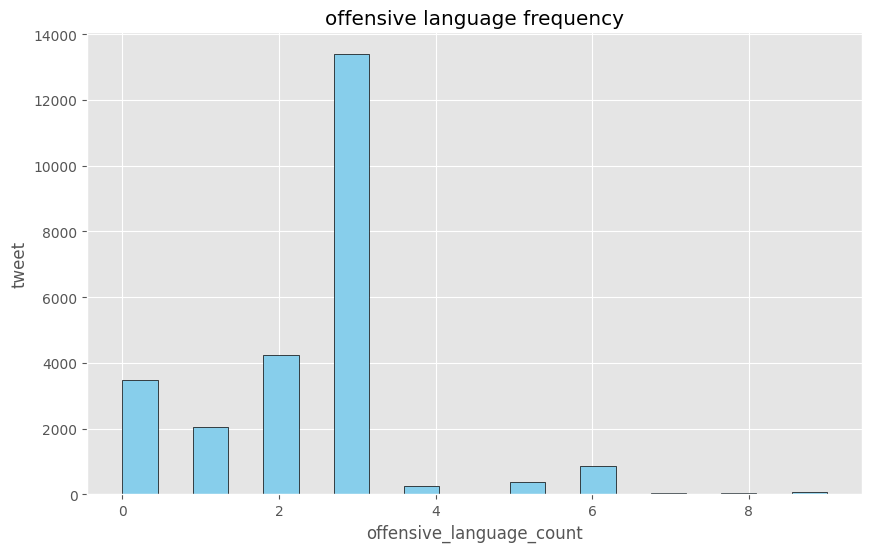

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(tweet_df['offensive_language_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('offensive language frequency')
plt.xlabel('offensive_language_count')
plt.ylabel('tweet')
plt.show()

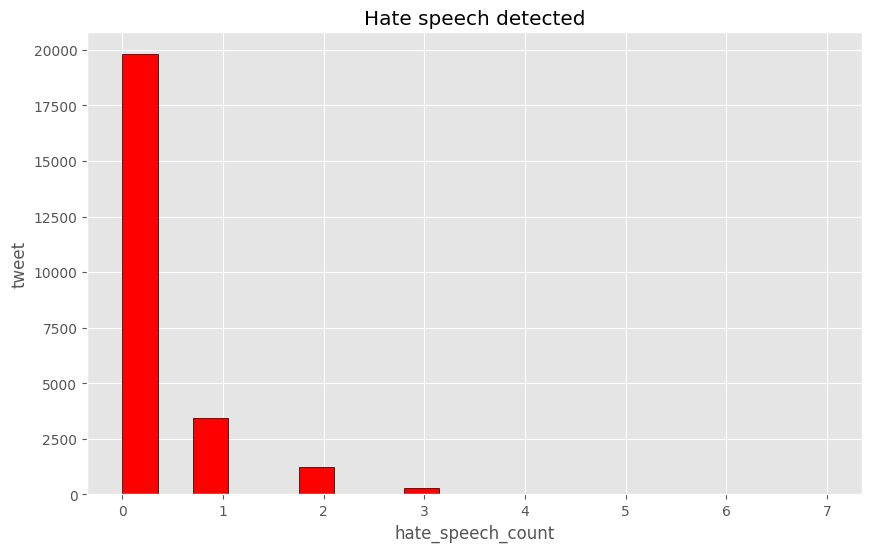

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(tweet_df['hate_speech_count'], bins=20, color='red', edgecolor='black')
plt.title('Hate speech detected')
plt.xlabel('hate_speech_count')
plt.ylabel('tweet')
plt.show()

Data Cleaning

In [ ]:
tweet_df.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [ ]:
tweet_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
24778    False
24779    False
24780    False
24781    False
24782    False
Length: 24783, dtype: bool

Data processing
Checking for data distribution in the tweet column

In [ ]:
tweet_df['tweet'].value_counts()

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...          1
RT @MurderHigashi: I cannot be worried 'bout no bitch.                                                                                                1
RT @MrPerfect_22: Most of these niggas go broke for these hoes !!                                                                                     1
RT @MrPOONsoaker: Foh RT @Thotcho: @MrPOONsoaker lmao 6&#8242;0 but I&#8217;m hella skinny so bitches don&#8217;t like me                             1
RT @MrNationWide: fake eyelashes are okay if they look natural, but some of you bitches look like you gonna take flight if you blink too fa&#8230;    1
                                                                                                                                                     ..
But she can shade the shit out a bitch RT @axolROSE: #YourWifeCantRead                  

In [ ]:
tweet_df['offensive_language_count'].value_counts()

3    13383
2     4246
0     3475
1     2066
6      857
5      369
4      251
9       66
8       37
7       33
Name: offensive_language_count, dtype: int64

In [ ]:
tweet_df['hate_speech_count'].value_counts()

0    19790
1     3419
2     1251
3      287
4       21
5        7
6        5
7        3
Name: hate_speech_count, dtype: int64

Stemming the tweets to remove all non tweet letters/word/numbers/special xters

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(twt):

  clean_twt = re.sub('[^a-zA-Z]',' ', twt)
  clean_twt = re.sub('[RT]','',twt)
  clean_twt = clean_twt.lower()
  clean_twt = clean_twt.split()
  clean_twt = [port_stem.stem(word) for word in clean_twt if not stopwords. words('english')]
  clean_twt = ' '.join(clean_twt)

  return clean_twt

In [ ]:
tweet_df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,clean_twt
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,


In [ ]:
tweet_df.tweet


0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Initialize Porter Stemmer
port_stem = PorterStemmer()

# Function to clean and stem the text
def clean_and_stem(text):
    # Remove Twitter addresses (words between '@' and ':')
    text_without_twitter = re.sub(r'@\w+:', '', text)

    # Remove non-alphabetic characters, RT, and numbers
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text_without_twitter)
    cleaned_text = re.sub(r'\bRT\b', '', cleaned_text)

    # Convert to lowercase
    cleaned_text = cleaned_text.lower()

    # Tokenize the text
    tokens = word_tokenize(cleaned_text)

    # Remove stopwords and stem each word
    stemmed_tokens = [port_stem.stem(word) for word in tokens if word not in stopwords.words('english')]

    # Join the stemmed tokens back into a string
    cleaned_and_stemmed_text = ' '.join(stemmed_tokens)

    return cleaned_and_stemmed_text

# Apply the cleaning and stemming function to the "tweet" column
tweet_df['clean_twt'] = tweet_df['tweet'].apply(clean_and_stem)






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Apply the cleaning and stemming function to the "tweet" column
tweet_df['clean_twt'] = tweet_df['tweet'].apply(clean_and_stem)


In [ ]:
tweet_df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,clean_twt
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain clean hous amp man alway take t...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad cuffin dat hoe st place
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,urkindofbrand dawg ever fuck bitch start cri c...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,viva base look like tranni
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya


In [ ]:
tweet_df.clean_twt[3]

'viva base look like tranni'

In [ ]:
tweet_df['count']

0        3
1        3
2        3
3        3
4        6
        ..
24778    3
24779    3
24780    3
24781    6
24782    3
Name: count, Length: 24783, dtype: int64

In [ ]:
tweet_df.columns

Index(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'class', 'tweet', 'clean_twt'],
      dtype='object')

In [ ]:
df = tweet_df.drop(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'class', 'tweet'],
      axis=1)

In [ ]:
df

,clean_twt
0,woman complain clean hous amp man alway take t...
1,boy dat cold tyga dwn bad cuffin dat hoe st place
2,urkindofbrand dawg ever fuck bitch start cri c...
3,viva base look like tranni
4,shit hear might true might faker bitch told ya
...,...
24778,muthaf lie pearl corey emanuel right tl trash ...
24779,gone broke wrong heart babi drove redneck crazi
24780,young buck wan na eat dat nigguh like aint fuc...
24781,youu got wild bitch tellin lie


In [ ]:
def polarity(clean_twt):
  return TextBlob(clean_twt).sentiment.polarity

In [ ]:
df['polarity'] = df['clean_twt'].apply(polarity)

In [ ]:
df.head(5)

,clean_twt,polarity
0,woman complain clean hous amp man alway take t...,0.366667
1,boy dat cold tyga dwn bad cuffin dat hoe st place,-0.650000
2,urkindofbrand dawg ever fuck bitch start cri c...,-0.300000
3,viva base look like tranni,-0.800000
4,shit hear might true might faker bitch told ya,0.075000


calculating and attach sentiment

In [ ]:
def sentiment(label):
  if label <0:
     return "Negative"
  elif label ==0:
    return "neutral"
  elif label >0:
    return "positive"

In [ ]:
df['sentiment'] = df['polarity'].apply(sentiment)

In [ ]:
df.head()

,clean_twt,polarity,sentiment
0,woman complain clean hous amp man alway take t...,0.366667,positive
1,boy dat cold tyga dwn bad cuffin dat hoe st place,-0.650000,Negative
2,urkindofbrand dawg ever fuck bitch start cri c...,-0.300000,Negative
3,viva base look like tranni,-0.800000,Negative
4,shit hear might true might faker bitch told ya,0.075000,positive


Visualization of the df

<Axes: xlabel='sentiment', ylabel='count'>

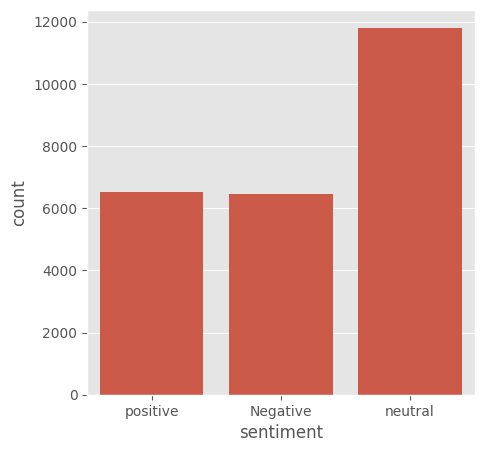

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df)

visualization using pie-chart

Text(0.5, 1.0, 'Distribution of sentiment tweets')

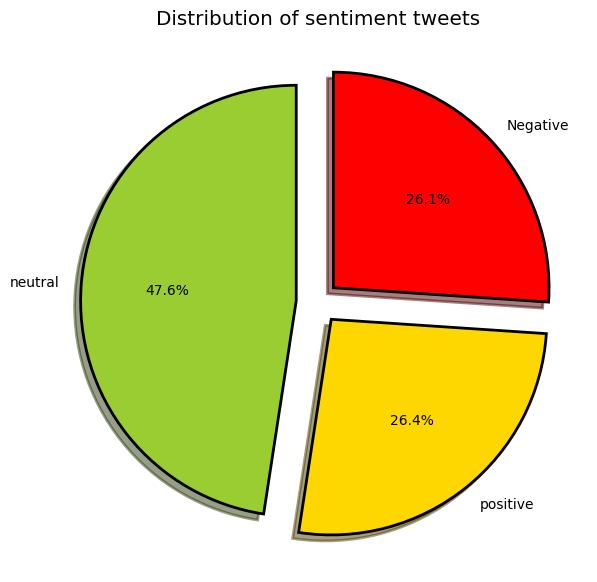

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen","gold","red")
wp = {'linewidth':2, 'edgecolor': "black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
          startangle=90, wedgeprops = wp,explode = explode, label='')
plt.title('Distribution of sentiment tweets')


Creating a bi-gram model

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['clean_twt'])

In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("first 20 features:\n {}".format(feature_names[:20]))

Number of features: 146508

first 20 features:
 ['aa' 'aa bfmv' 'aa blink' 'aa class' 'aa flawless' 'aa kuw' 'aa lol'
 'aa miw' 'aa plw' 'aa pm' 'aaaaaaaaand' 'aaaaaaaaand begin' 'aaahhhhh'
 'aaahhhhh internet' 'aahahah' 'aahahah fuck' 'aaiv' 'aakwohdfgv'
 'aakxwif' 'aaliyah']


In [ ]:
X = df['clean_twt']
Y = df['sentiment']
X = vect.transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y,random_state=42)

viewing the count of the x and y for training and for testing

In [ ]:
print(X.shape,X_train.shape, X_test.shape)

(24783, 146508) (19826, 146508) (4957, 146508)


In [ ]:
print(Y.shape,Y_train.shape, Y_test.shape)

(24783,) (19826,) (4957,)


looking inside our training and test data

In [ ]:
X_test

<4957x146508 sparse matrix of type '<class 'numpy.int64'>'
	with 74974 stored elements in Compressed Sparse Row format>

In [ ]:
X_train

<19826x146508 sparse matrix of type '<class 'numpy.int64'>'
	with 299581 stored elements in Compressed Sparse Row format>

#training the machine
Convert the text values to numerical value data which is the only value the machine can read

In [ ]:
#vectorizer = TfidfVectorizer()

#X_train = vectorizer.fit_transform(X_train)
#X_test = vectorizer.transform(X_test)

print the vectorizer training data X to see the convertion done from text to numeric

In [ ]:
#print(X_train)

0  rep all the words in tweet 1,
1 rep words in tweet 2  etc

Training the machine learning model.

Logistic Regression model is our choosen model for training.

it is a classification model. it is use in classification

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
model_pred = model.predict(X_test)

Model Evaluation.

accessing the accuracy score on the trained machine

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [ ]:
print('Accuracy score on the trained machine model:',training_data_accuracy)

Accuracy score on the trained machine model: 0.9994451730051448


Applying confusion metrics and making classifcation report

In [ ]:
style.use('classic')
cm = confusion_matrix(Y_test, model_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = model.classes_)

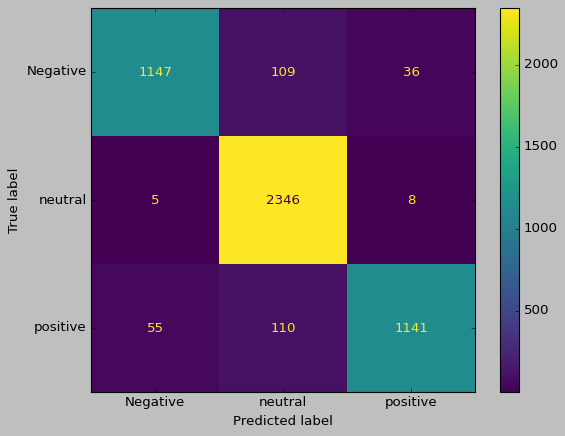

In [ ]:
disp.plot()

Test our trained machine with the first test data to see it accuracy output.

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)

In [ ]:
print('Accuracy score on the trained machine model:',test_data_accuracy)

Accuracy score on the trained machine model: 0.9348396207383498


Model accuracy is the accuracy from testing the machine = 93.4%